# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


## Group 43

* Andrea Monserrat Ruiz Gómez   - A0XXXXXXX
* Josías Ruiz Peña              - A0XXXXXXX
* Saúl Yovani Salgueiro Lindoro - A0XXXXXXX
* Jesús Ángel Salazar Marcatoma - A00513236

In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [2]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
# changing dataset path to local folder
DATA_PATH = 'asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [4]:
Y_train = np.array(train_df['label'])
Y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']

In [5]:
X_train = train_df.values.astype(np.float32)
X_val = valid_df.values.astype(np.float32)

In [14]:
X_val[:5]

array([[149., 149., 150., ..., 112., 120., 107.],
       [126., 128., 131., ..., 184., 182., 180.],
       [ 85.,  88.,  92., ..., 225., 224., 222.],
       [203., 205., 207., ..., 240., 253., 255.],
       [188., 191., 193., ...,  46.,  46.,  53.]], dtype=float32)

In [15]:
def split_val_test(x: np.array, y: np.array, pct = 0.5, shuffle = True) -> (np.array, np.array, np.array, np.array):
  """
    Parameters
      x : np.array, required
        Specify the features X

      y : np.array, required
        Specify the features y

      pct : float, optional
        Specify the percentage of data that should be used for the validation dataset

      shuffle : booelan, optional
        Whether or not to shuffle the data before splitting.

    Return
      x_val, y_val, x_test, y_test
        splitted validation and test datasets
  """
  size = len(x)                                 # computes size of the given x np.array (assuming that x and y have the same save)
  valSize = int(size * pct)                     # computes the size of np.array meant for validation

  if shuffle:                                   # if shuffle equals true, then suffle all items in the given x and y
    shuffledIndexes = np.arange(size)           # creates an "size"-length array (items are 0 to size - 1)
    np.random.shuffle(shuffledIndexes)          # shuffling indexes
    x = x[shuffledIndexes]                      # shuffling x and y in union
    y = y[shuffledIndexes]

  x_val = x[:valSize]                           # partition x_val, y_val based on valSize
  y_val = y[:valSize].reshape(valSize, 1)
  x_test = x[valSize:]                          # assigning x_test, y_test to the remaining items
  y_test = y[valSize:].reshape(valSize, 1)

  return x_val, y_val, x_test, y_test

In [16]:
# partitioning X_val and Y_val
x_val, y_val, x_test, y_test = split_val_test(X_val, Y_val)

In [23]:
# logs partitioned dataset shapes
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(3586, 784)
(3586, 1)
(3586, 784)
(3586, 1)


In [24]:
alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [ ]:
def normalise(x) -> np.array:
  """
    Parameters
      x : np.array, required
        Specify the np.array to normalize

    Return
      normalized_x
        normalized np.array
  """

  mean = x.mean()             # Compute the arithmetic mean.
  std = x.std()               # Compute the standard deviation.

  return (x - mean) / std     # normalizing the given np.array

In [ ]:
# normalizing x_train, x_val, and x_test

x_train = normalise(X_train)
x_val = normalise(x_val)
x_test = normalise(x_test)

### Graficar muestras

In [43]:
arr = np.where(Y_train == 1)

In [46]:
arr[0][:3]

array([29, 30, 95])

In [151]:
def displaySamples(samplesToDisplay, size):
  """
    Parameters
      samplesToDisplay : list<str>, required
        Specify the letters to display

      size : int, required
        Specify the number of samples that should be display per letter
  """

  MAX_ROWS = size                                                 # specify the number of rows in the plot grid
  MAX_COLS = len(samplesToDisplay)                                # specify the number of columns in the plot grid
  sampleImgIndexesByLetterIndex = {}                              # holds the image sample indexes based on the letter index

  for i in range(0, MAX_COLS):
    res = np.where(Y_train == i)                                  # queries for an specify value (letter index) in the Y_train np_array
    sampleImgIndexesByLetterIndex[i] = res[0][:MAX_ROWS]          # stores the indexes that matched the query

  _, axes = plt.subplots(                                         # init fig image grid
      ncols = MAX_COLS,
      nrows = MAX_ROWS,
      figsize = (10, 2)
  )

  col = 0
  for key in sampleImgIndexesByLetterIndex:                       # iterate for each letter in order to display its samples
    sampleImgIndexes = sampleImgIndexesByLetterIndex[key]
    for row in range(0, MAX_ROWS):
        axes[row][col].imshow(X_train[sampleImgIndexes[row]].reshape(28, 28), cmap='gray', aspect="auto")   # display image
        axes[row][col].axis("off")
    col += 1
  plt.subplots_adjust(wspace=.05, hspace=.05)
  plt.show()



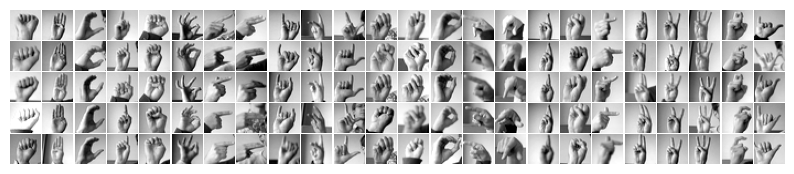

In [152]:
displaySamples(alphabet)

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True) -> (np.array, np.array):
  """
    Parameters
      mb_size : int, required
        Specify mini batch size to process

      x : np.array, required
        Specify the features X

      y : np.array, required
        Specify the features y

      shuffle : booelan, optional
        Whether or not to shuffle the data before splitting.

    Return
      normalized_x
        normalized np.array
  """


  assert x.shape[0] == y.shape[0], 'X and y must be the same size'
  total_data = x.shape[0]                                                           # compute size of dataset
  if shuffle:                                                                       # if shuffle is true, then shuffle x and y in union
      idxs = np.arange(total_data)
      np.random.shuffle(idxs)
      x = x[idxs]
      y = y[idxs]
  return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))  # compute mini batch

## Nuestra clase Linear, ReLU y Sequential

In [ ]:
class np_tensor(np.ndarray): pass

###  Clase Linear

In [ ]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters utilizando Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # esta el forward de la clase lineal
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [ ]:
# https://www.digitalocean.com/community/tutorials/relu-function-in-python
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Clase Sequential

In [ ]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - lista que contiene objetos de tipo Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

In [ ]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Costo
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calcular gradientes
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Loop de entrenamiento

In [ ]:
def accuracy(x, y, mb_size, model):
  correct = 0
  total = 0
  for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
      pred = model(x.T.view(np_tensor))
      correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
      total += pred.shape[1]
  return correct/total

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
  for epoch in range(epochs):
    for i, (x, y) in enumerate(create_minibatches(mb_size, X_train, Y_train)):
        scores = model(x.T.view(np_tensor))
        _, cost = softmaxXEntropy(scores, y)
        model.backward()
        model.update(learning_rate)
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size, model)}')

### Create your model and train it

In [ ]:
# number of pixels
PIXELS = X_train.shape[1]
PIXELS

784

In [ ]:
# alphabet size
OUTPUT = len(alphabet)
OUTPUT

24

In [ ]:
# define hyper parameters
mb_size = 512               # specify the mini batch size to be process
learning_rate = 1e-4        # specify the learning rate
epochs = 20                 # defines the number of times that the learning algorithm will work

In [ ]:
# creates an instance of Sequential_layers
# model is made of 6 layers (3 Linear instances and 2 ReLU instances)
model = Sequential_layers([Linear(PIXELS, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, OUTPUT)])

In [ ]:
# train model
train(model, epochs, mb_size, learning_rate)

costo: 4.040069188245083, accuracy: 0.06469604015616286
costo: 3.4447192660139088, accuracy: 0.09202453987730061
costo: 3.237911658552979, accuracy: 0.11349693251533742
costo: 3.0877310109794225, accuracy: 0.13747908533184608
costo: 3.057006234464374, accuracy: 0.15030674846625766
costo: 2.9709729088499754, accuracy: 0.1634132738427217
costo: 2.8044770398456453, accuracy: 0.18655883993307307
costo: 2.720038628594556, accuracy: 0.20384829894032347
costo: 2.736346961987222, accuracy: 0.21974344673731178
costo: 2.6347755259202756, accuracy: 0.2350808700501952
costo: 2.5781728293377233, accuracy: 0.2551589514779699
costo: 2.512825834868068, accuracy: 0.2682654768544339
costo: 2.4826527728105794, accuracy: 0.2908533184606804
costo: 2.41943531594731, accuracy: 0.2989403234802008
costo: 2.337914785074812, accuracy: 0.3139988845510318
costo: 2.308048561466104, accuracy: 0.3301728945900725
costo: 2.2217022787583947, accuracy: 0.3418851087562744
costo: 2.2505874276126296, accuracy: 0.34495259341

the resulting trained model reports a 78% of accuracy

### Test your model on Random data from your test set

In [ ]:
idx = np.random.randint(len(y_test))                    # genering random index
pred = model.predict(x_test[idx].reshape(-1, 1))        # making prediction

In [ ]:
# logs randomly generated index
idx

3013

In [ ]:
# logs real value
alphabet[y_test[idx].reshape(-1, 1)[0][0]]

'h'

In [ ]:
# logs predicted index
pred

7

In [ ]:
# logs value based on predicted index
alphabet[pred]

'h'